In [0]:
from google.colab import drive
drive.mount('/content/MyDrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/MyDrive


In [0]:
import os
import sys
import math
import cv2
import glob
import pathlib
import imageio
import random
import numpy as np
import pandas as pd
from PIL import Image
from random import shuffle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

%matplotlib inline

In [0]:
PATH= '/content/MyDrive/"My Drive"/train'
# PATH= '/content/MyDrive/"My Drive"'
print(PATH)
# !ls {PATH}

/content/MyDrive/"My Drive"/train


In [0]:
data_root = pathlib.Path('/content/MyDrive/My Drive/train')
print(data_root)
all_image_paths = list(data_root.glob('*.jpeg'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)
image_count = len(all_image_paths)
print("count : "+str(image_count))

/content/MyDrive/My Drive/train
count : 35165


In [0]:
df=pd.read_csv('MyDrive/My Drive/trainLabels.csv')
print(df.head())

      image  level
0   10_left      0
1  10_right      0
2   13_left      0
3  13_right      0
4   15_left      1


In [0]:
# label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names=[i for i in range(5)]
print('label_names : '+str(label_names))

label_to_index = dict((name, index) for index,name in enumerate(label_names))
label_to_index

label_names : [0, 1, 2, 3, 4]


{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}

In [0]:
all_image_labels = list(df['level'])
print(all_image_labels)

[0, 0, 0, 0, 1, 2, 4, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 4, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 4, 4, 2, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 4, 4, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [0]:
'''function to load folder into arrays and 
then it returns that same array'''
def loadImages(path):
    # Put files into lists and return them as one list of size 4
    image_files = sorted([os.path.join(path, 'train', file)
         for file in os.listdir(path) if      file.endswith('.jpeg')])
    return image_files

In [0]:
x=loadImages(data_root)
print(x)

['/content/MyDrive/My Drive/train/train/10003_left.jpeg', '/content/MyDrive/My Drive/train/train/10003_right.jpeg', '/content/MyDrive/My Drive/train/train/10007_left.jpeg', '/content/MyDrive/My Drive/train/train/10007_right.jpeg', '/content/MyDrive/My Drive/train/train/10009_left.jpeg', '/content/MyDrive/My Drive/train/train/10009_right.jpeg', '/content/MyDrive/My Drive/train/train/1000_left.jpeg', '/content/MyDrive/My Drive/train/train/1000_right.jpeg', '/content/MyDrive/My Drive/train/train/10010_left.jpeg', '/content/MyDrive/My Drive/train/train/10010_right.jpeg', '/content/MyDrive/My Drive/train/train/10013_left.jpeg', '/content/MyDrive/My Drive/train/train/10013_right.jpeg', '/content/MyDrive/My Drive/train/train/10014_left.jpeg', '/content/MyDrive/My Drive/train/train/10014_right.jpeg', '/content/MyDrive/My Drive/train/train/10015_left.jpeg', '/content/MyDrive/My Drive/train/train/10015_right.jpeg', '/content/MyDrive/My Drive/train/train/10017_left.jpeg', '/content/MyDrive/My Dri

In [0]:
# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.show()
# Display two images
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

In [0]:
df['level'].value_counts()

0    25810
2     5292
1     2443
3      873
4      708
Name: level, dtype: int64

In [0]:

DIR = data_root

# Want to know how we should format the height x width image data dimensions
# for inputting to a keras model
def get_size_statistics():
    heights = []
    widths = []
    img_count = 0
    for img in os.listdir(DIR):
        data_root = os.path.join(DIR, img)
        if img_count<250:
            data = np.array(Image.open(data_root))
            heights.append(data.shape[0])
            widths.append(data.shape[1])
            img_count += 1
    avg_height = sum(heights) / len(heights)
    avg_width = sum(widths) / len(widths)
    print("Average Height: " + str(avg_height))
    print("Max Height: " + str(max(heights)))
    print("Min Height: " + str(min(heights)))
    print('\n')
    print("Average Width: " + str(avg_width))
    print("Max Width: " + str(max(widths)))
    print("Min Width: " + str(min(widths)))

get_size_statistics()

KeyboardInterrupt: ignored

In [0]:
def label_img(name):
    n=name.split('.')[0]
#     print(n)
    cdf = df[df['image'] == n]
#     print(cdf)
    label = cdf['level'].values[0]
    l=[0]*5
    l[label]=1
    return np.array(l)

In [0]:
IMG_SIZE = 299
# DIR = data_root
def load_training_data():
#     DIR = data_root
    train_data = []
    img_count = 0
    zc=0
    oc=0
    for img in os.listdir(data_root):
        label = label_img(img)
        img_count = img_count+1
        if(label==0):
          zc+=1
        else:
          oc+=1
        pat = os.path.join(data_root, img)
        if(zc!=oc):
          continue
        if(img_count>250):
            break
        if img_count<250:
            img = Image.open(pat)
#             img = img.convert('L')
            img = img.resize((IMG_SIZE,299), Image.ANTIALIAS)
            # print(np.array(img).shape)
            train_data.append([np.array(img), label])
        
    shuffle(train_data)
    return train_data

In [0]:
def load_training_data2():
    # DIR = data_root
    train_data = []
    img_count = 0
    for img in os.listdir(data_root):
        label = label_img(img)
        if(list(label)[0]==1):
          continue
        print(label)
        img_count = img_count+1
        pat = os.path.join(data_root, img)
        if(img_count>250):
            break
        if img_count<250:
            img = Image.open(pat)
#             img = img.convert('L')
            img = img.resize((IMG_SIZE,299), Image.ANTIALIAS)
            # print(np.array(img).shape)
            train_data.append([np.array(img), label])
        
    shuffle(train_data)
    return train_data

In [0]:
train_data = load_training_data()
train_data2 = load_training_data2()
# print((train_data))
print(len(train_data2))
# print(train_data[0])
# train, validate, test = np.split(train_data, [int(.6*len(train_data)), int(.8*len(train_data))])
train, test = np.split(train_data, [int(.8*len(train_data))])
train2, test2 = np.split(train_data2, [int(.8*len(train_data2))])

[0 0 1 0 0]
[0 0 1 0 0]
[0 1 0 0 0]
[0 0 1 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 0 1 0 0]
[0 1 0 0 0]
[0 0 1 0 0]
[0 1 0 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 0 0 1]
[0 0 0 1 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 1 0 0 0]
[0 0 1 0 0]
[0 1 0 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 0 1 0 0]
[0 0 0 1 0]
[0 0 0 1 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 1 0 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 1 0 0 0]
[0 0 1 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 0 1 0 0]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 1 0 0]
[0 0 1 0 0]
[0 1 0 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 1 0 0 0]
[0 0 1 0 0]
[0 1 0 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 1 0 0 0]
[0 0 0 0 1]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1

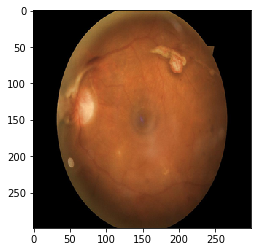

In [0]:
plt.imshow(train_data2[20][0])#, cmap = 'gist_gray')

In [0]:
trainImages = np.array([i[0] for i in train]).reshape(-1, 299, 299, 3)
trainImages2 = np.array([i[0] for i in train2]).reshape(-1, 299, 299, 3)
trainLabels = np.array([i[1] for i in train])
# print(trainLabels)
testImages = np.array([i[0] for i in test]).reshape(-1, 299, 299, 3)
testImages2 = np.array([i[0] for i in test2]).reshape(-1, 299, 299, 3)
trainLabels1 = np.array([0 if(i[1][0]==1) else 1 for i in train])
testLabels1 = np.array([0 if(i[1][0]==1) else 1 for i in test])

li=[]
for i in train2:
  if(i[1][1]==1):
    li.append(1)
  if(i[1][2]==1):
    li.append(2)
  if(i[1][3]==1):
    li.append(3)
  if(i[1][4]==1):
    li.append(4)

trainLabels2 = np.array(li)
print(trainLabels1)
print(trainLabels2)


zi=[]
for i in test2:
  if(i[1][1]==1):
    zi.append(1)
  if(i[1][2]==1):
    zi.append(2)
  if(i[1][3]==1):
    zi.append(3)
  if(i[1][4]==1):
    zi.append(4)
testLabels2=np.array(zi)
print(testLabels1)
print(testLabels2)

trainImages.shape

[0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1
 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1
 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1
 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 1 0 1 0 0 1 0 0 0 0]
[2 2 1 1 1 2 2 2 1 2 1 1 1 2 1 2 2 4 2 3 4 2 4 2 1 1 2 2 2 2 2 1 1 4 2 1 4
 4 3 2 2 2 2 1 2 2 1 1 2 4 4 1 2 2 2 2 4 2 1 4 2 2 1 4 2 2 3 2 2 1 2 2 1 1
 2 1 2 2 1 4 2 2 2 4 2 1 2 1 2 1 2 2 2 4 2 2 2 1 2 2 1 2 2 1 2 2 1 4 1 2 1
 2 2 1 2 1 2 2 1 3 2 1 3 2 2 2 1 2 1 2 1 1 2 1 2 2 2 2 1 1 2 2 3 4 3 2 4 2
 2 2 2 2 2 1 2 2 1 2 1 3 2 1 1 2 1 2 1 2 4 1 2 4 1 2 1 2 2 2 1 4 2 2 2 2 2
 1 2 1 3 2 1 2 2 2 1 2 4 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 1 0 1 0 0]
[3 2 4 2 2 4 4 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 1 3 2 2 2 4 1 4 2 2 2 2 2 1 2
 4 2 4 1 2 1

(199, 299, 299, 3)

In [0]:
import tensorflow as tf
import keras
from keras import optimizers
from keras.preprocessing import image
from keras.models import Sequential
from keras.models import Model
from keras.models import load_model
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Input, Dense, Dropout, Flatten, LeakyReLU, Activation
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D
from keras.layers. normalization import BatchNormalization

from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import decode_predictions

from keras.layers.advanced_activations import LeakyReLU
LR = LeakyReLU()
LR.__name__ = 'relu'

from keras.applications.xception import Xception
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.applications.densenet import DenseNet169
from keras.applications.densenet import DenseNet201

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15)

from keras.callbacks import ModelCheckpoint   
checkpointer = ModelCheckpoint(filepath='DR.model.best.hdf5', monitor = 'val_acc', mode = 'auto',period = 1,verbose=1, save_best_only=True)

from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=10, epsilon=0.0001, min_lr=0.001)

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1335: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [0]:
y=to_categorical(trainLabels1)
Y=to_categorical(trainLabels2)
# y
p=list(Y)
for i in range(len(p)):
  z=list(p[i])
  z.pop(0)
  p[i]=np.array(z)

print(y)
p=np.array(p)
p



[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],


In [0]:
y1=to_categorical(testLabels1)
Y1=to_categorical(testLabels2)
# print(y1)
p1=list(Y1)
for i in range(len(p1)):
  z=list(p1[i])
  z.pop(0)
  p1[i]=np.array(z)

print(y1)
p1=np.array(p1)
p1

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],


In [0]:
IV3model = InceptionV3(include_top=False, weights='imagenet', input_tensor=None, input_shape=(299,299,3), pooling='avg')#, classes=1000)














87916544/87910968 [==============================] - 4s 0us/step


In [0]:
Xmodel = Xception(include_top=False, weights='imagenet', input_tensor=None, input_shape=None, pooling='avg')#, classes=1000)

83689472/83683744 [==============================] - 3s 0us/step


In [0]:
IRV2model = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=None, pooling='avg')#, classes=1000)

219062272/219055592 [==============================] - 8s 0us/step


In [0]:
# fit model on dataset
def fit_model(trainX, trainy):
	# define model
  for layer in IV3model.layers:
      layer.trainable = False
  for layer in Xmodel.layers:
      layer.trainable = False
  for layer in IRV2model.layers:
      layer.trainable = False

  def mod(m):
      # model = Model(inputs=m.inputs, outputs=m.layers[-1].output)
      # print(m.inputs)
      x = m.layers[-1].output
      # x=Flatten()(x)
      x=keras.layers.Dense(1024)(x)
      x=LeakyReLU(alpha=0.2)(x)
      x=Dropout(0.25)(x)
      x=keras.layers.Dense(512)(x)
      x=LeakyReLU(alpha=0.2)(x)
      x=Dropout(0.5)(x)
      x=keras.layers.Dense(256)(x)
      x=LeakyReLU(alpha=0.2)(x)
      x=Dropout(0.5)(x)
      x=keras.layers.Dense(128)(x)
      # return x
      x=LeakyReLU(alpha=0.2)(x)
      x=Dropout(0.5)(x)
      return x
      # x=keras.layers.Dense(2,activation='softmax')(x)#, activation=LeakyReLU(alpha=0.2))(x)
      # x=Activation('softmax')(x)
      # return x
      # sdnn=Model(inputs=model.input,outputs=x)  
      # return sdnn
      # sdnn.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 2e-4), metrics = ['accuracy'])
    # fit model
      # sdnn.fit(x=trainImages,y=to_categorical(trainLabels1),batch_size=32,epochs=300,validation_split=0.2,class_weight='auto', callbacks=[early_stopping,checkpointer,reduce_lr],verbose=1)
      # return sdnn
  sdnn1 = mod(IV3model)
  sdnn2 = mod(Xmodel)
  sdnn3 = mod(IRV2model)
  # print(sdnn1)
  x = keras.layers.Average()([sdnn1, sdnn2, sdnn3])
  main_output = Dense(2, activation='softmax')(x)
  print(IV3model.inputs)
  print(type(IV3model.inputs))
  model = Model(inputs=[IV3model.inputs[0],Xmodel.inputs[0],IRV2model.inputs[0]], outputs=[main_output])
  print(model.summary())
  return model

In [0]:
res = fit_model(trainImages,to_categorical(trainLabels1))	
res
from keras.utils import plot_model
plot_model(res, to_file='model.png',show_shapes=True,show_layer_names=True)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
res.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 2e-4), metrics = ['accuracy'])

In [0]:
res.fit(x=[trainImages,trainImages,trainImages],y=y,batch_size=32,epochs=300,validation_split=0.2,class_weight='auto', callbacks=[early_stopping,checkpointer,reduce_lr],verbose=1)

Train on 159 samples, validate on 40 samples
Epoch 1/300
159/159 [==============================] - 3s 18ms/step - loss: 0.5079 - acc: 0.8176 - val_loss: 3.2060 - val_acc: 0.8000

Epoch 00001: val_acc did not improve from 0.85000
Epoch 2/300
159/159 [==============================] - 3s 18ms/step - loss: 0.1839 - acc: 0.9182 - val_loss: 3.0119 - val_acc: 0.7500

Epoch 00002: val_acc did not improve from 0.85000
Epoch 3/300
159/159 [==============================] - 3s 18ms/step - loss: 0.1266 - acc: 0.9623 - val_loss: 2.4387 - val_acc: 0.7750

Epoch 00003: val_acc did not improve from 0.85000
Epoch 4/300
159/159 [==============================] - 3s 18ms/step - loss: 0.3654 - acc: 0.8868 - val_loss: 3.5137 - val_acc: 0.7000

Epoch 00004: val_acc did not improve from 0.85000
Epoch 5/300
159/159 [==============================] - 3s 18ms/step - loss: 0.4084 - acc: 0.7862 - val_loss: 3.0764 - val_acc: 0.8000

Epoch 00005: val_acc did not improve from 0.85000
Epoch 6/300
159/159 [=========

In [0]:
res.evaluate(x=[testImages,testImages,testImages], y=to_categorical(testLabels1))#, batch_size=None, verbose=1, sample_weight=None, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)

50/50 [==============================] - 1s 16ms/step


[4.193927688598633, 0.7200000071525574]

In [0]:
resfeatures = res.predict([testImages,testImages,testImages],batch_size = 32, verbose = 1)
print(resfeatures)

50/50 [==============================] - 10s 208ms/step
[[1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 1.9301344e-36]
 [1.0000000e+00 0.0000000e+00]
 [9.8362929e-01 1.6370682e-02]
 [1.0000000e+00 2.9731969e-30]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 1.8635724e-12]
 [1.0000000e+00 0.0000000e+00]
 [8.8089355e-06 9.9999118e-01]
 [0.0000000e+00 1.0000000e+00]
 [1.0000000e+00 2.0312115e-32]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 8.2883009e-23]
 [1.0000000e+00 3.8677465e-31]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 3.4963911e-16]
 [1.0000000e+00 1.0289966e-10]
 [1.0000000e+00 0.0000000e+00]
 [6.4466905e-16 1.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [2.1082880e-07 9.9999976e-01]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 6.9121593e-09]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [9.4853032e-1

In [0]:
RN50model = ResNet50(weights='imagenet',pooling = 'avg',include_top = False)
# for l in RN50model.layers:
  # l.name = "%s_workaround1" % l.name


94658560/94653016 [==============================] - 3s 0us/step


In [0]:
DN169model = DenseNet169(include_top=False, weights='imagenet', input_tensor=None, input_shape=None, pooling='avg')#, classes=1000)
for l in DN169model.layers:
  l.name = "%s_workaround2" % l.name

51879936/51877672 [==============================] - 2s 0us/step


In [0]:
DN201model = DenseNet201(include_top=False, weights='imagenet', input_tensor=None, input_shape=None, pooling='avg')#, classes=1000)
# for l in DN201model.layers:
#   l.name = "%s_workaround3" % l.name

74842112/74836368 [==============================] - 3s 0us/step


In [0]:
# fit model on dataset
def fit_model1(trainX, trainy):
	# define model
  for layer in RN50model.layers:
      layer.trainable = False
  for layer in DN169model.layers:
      layer.trainable = False
  for layer in DN201model.layers:
      layer.trainable = False
  
  def mod(m):
      # model = Model(inputs=m.inputs, outputs=m.layers[-1].output)
      # print(m.inputs)
      x = m.layers[-1].output
      # x=Flatten()(x)
      x=keras.layers.Dense(2048)(x)#, activation=LeakyReLU(alpha=0.2))(x)
      x=LeakyReLU(alpha=0.2)(x)
      x=Dropout(0.25)(x)
      x=keras.layers.Dense(1024)(x)#, activation=LeakyReLU(alpha=0.2))(x)
      x=LeakyReLU(alpha=0.2)(x)
      x=Dropout(0.5)(x)
      x=keras.layers.Dense(512)(x)#, activation=LeakyReLU(alpha=0.2))(x)
      x=LeakyReLU(alpha=0.2)(x)
      x=Dropout(0.5)(x)
      x=keras.layers.Dense(256)(x)#, activation=LeakyReLU(alpha=0.2))(x)
      # return x
      x=LeakyReLU(alpha=0.2)(x)
      x=Dropout(0.5)(x)
      return x
      x=keras.layers.Dense(4,activation='softmax')(x)#, activation=LeakyReLU(alpha=0.2))(x)
      # x=Activation('softmax')(x)
      # return x
      sdnn=Model(inputs=model.input,outputs=x)  

  sdnn1 = mod(RN50model)
  sdnn2 = mod(DN169model)
  sdnn3 = mod(DN201model)
  # print(sdnn1)
  x = keras.layers.Average()([sdnn1, sdnn2, sdnn3])
  main_output1 = Dense(4, activation='softmax', name='main_output')(x)
  # return x
  print(RN50model.inputs)
  print(type(RN50model.inputs))
  # Inputs = list of tensors
  # output = tensor
  # print(main_output)
  model = Model(inputs=[RN50model.inputs[0],DN169model.inputs[0],DN201model.inputs[0]], outputs=[main_output1])
  print(model.summary())
  return model

In [0]:
res1 = fit_model1(trainImages2,p)	
res1
from keras.utils import plot_model
plot_model(res1, to_file='model1.png', show_shapes=True, show_layer_names=True)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
res1.compile(loss = 'categorical_crossentropy', optimizer = optimizers.RMSprop(lr = 2e-4), metrics = ['accuracy'])

In [0]:
res1.fit(x=[trainImages2,trainImages2,trainImages2],y=p,batch_size=32,epochs=300,validation_split=0.2,class_weight='auto', callbacks=[early_stopping,checkpointer,reduce_lr],verbose=1)

Train on 159 samples, validate on 40 samples
Epoch 1/300
159/159 [==============================] - 39s 242ms/step - loss: 1.6975 - acc: 0.4277 - val_loss: 1.4386 - val_acc: 0.5000

Epoch 00001: val_acc did not improve from 0.85000
Epoch 2/300
159/159 [==============================] - 3s 18ms/step - loss: 1.2261 - acc: 0.4591 - val_loss: 2.0488 - val_acc: 0.5000

Epoch 00002: val_acc did not improve from 0.85000
Epoch 3/300
159/159 [==============================] - 3s 18ms/step - loss: 1.1917 - acc: 0.4843 - val_loss: 1.5422 - val_acc: 0.5000

Epoch 00003: val_acc did not improve from 0.85000
Epoch 4/300
159/159 [==============================] - 3s 18ms/step - loss: 1.2216 - acc: 0.5157 - val_loss: 1.2195 - val_acc: 0.3500

Epoch 00004: val_acc did not improve from 0.85000
Epoch 5/300
159/159 [==============================] - 3s 18ms/step - loss: 1.0020 - acc: 0.5094 - val_loss: 2.3986 - val_acc: 0.5000

Epoch 00005: val_acc did not improve from 0.85000
Epoch 6/300
159/159 [=======

In [0]:
res1.evaluate(x=[testImages2,testImages2,testImages2], y=p1, batch_size=32, verbose=1, sample_weight=None, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)

50/50 [==============================] - 1s 17ms/step


[1.3946844959259033, 0.6399999952316284]

In [0]:
res1features = res1.predict([testImages2,testImages2,testImages2],batch_size = 32, verbose = 1)
print(res1features)

50/50 [==============================] - 16s 321ms/step
[[1.56006971e-02 6.11120701e-01 7.24007115e-02 3.00877959e-01]
 [7.80375153e-02 7.44467914e-01 6.30329549e-02 1.14461593e-01]
 [1.36533203e-02 3.29122841e-01 6.88498840e-02 5.88373959e-01]
 [4.99542989e-02 7.45794773e-01 7.12218806e-02 1.33028999e-01]
 [4.76141050e-02 9.29351985e-01 1.03286300e-02 1.27053037e-02]
 [3.34829800e-02 7.32480764e-01 5.00401780e-02 1.83996066e-01]
 [1.35466065e-02 7.10093081e-01 4.20590527e-02 2.34301254e-01]
 [9.98553038e-02 7.22701430e-01 6.51248842e-02 1.12318359e-01]
 [1.82199422e-02 9.45995569e-01 1.37531245e-02 2.20313929e-02]
 [6.03588531e-03 9.82484400e-01 5.69589250e-03 5.78381587e-03]
 [1.22025423e-01 7.20214069e-01 8.40253159e-02 7.37351030e-02]
 [8.10048208e-02 7.84336090e-01 4.23448905e-02 9.23142061e-02]
 [1.32398844e-01 6.37409329e-01 9.45482478e-02 1.35643646e-01]
 [1.39258996e-01 6.18361175e-01 1.30692840e-01 1.11686952e-01]
 [1.93239246e-02 9.66533840e-01 5.98862348e-03 8.15362763e-03]

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
res.save('model.h5')  # creates a HDF5 file 'my_model.h5'
model_file = drive.CreateFile({'title' : 'model.h5'})  
model_file.SetContentFile('model.h5')
model_file.Upload()

# load the weights that yielded the best validation accuracy
# sdnn1.load_weights('sdnn1.best.hdf5')
# sdnn2.load_weights('sdnn2.best.hdf5')
# sdnn3.load_weights('sdnn3.best.hdf5')
# sdnn4.load_weights('sdnn4.best.hdf5')
# sdnn5.load_weights('sdnn5.best.hdf5')
# sdnn6.load_weights('sdnn6.best.hdf5')

In [0]:
res1.save('model2.h5')  # creates a HDF5 file 'my_model.h5'
model_file = drive.CreateFile({'title' : 'model2.h5'})  
model_file.SetContentFile('model2.h5')
model_file.Upload()